In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-dataset/DATASET.csv


#### Flow Remove Null,Unnecessary Words -> Tokenize -> Bag Of Words -> TF-IDF

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('/kaggle/input/spotify-dataset/DATASET.csv')

In [3]:
df.head()

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB


In [66]:
df.isnull().sum()

Review    0
label     0
dtype: int64

In [16]:
df['label'].value_counts()

label
NEGATIVE    29423
POSITIVE    23279
Name: count, dtype: int64

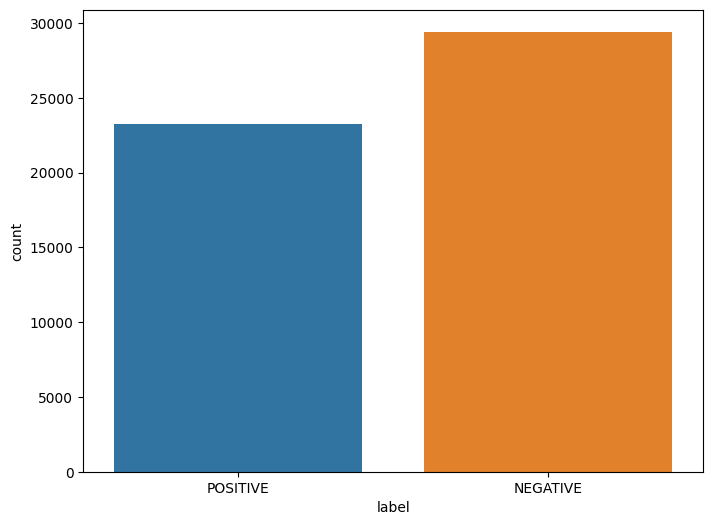

In [18]:
# Visualize the data
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=df)
plt.show()

In [23]:
df[df['Review'].duplicated()]

,Review,label
1848,Way too many ads,NEGATIVE
2391,Good app for songs,POSITIVE
2871,I love Spotify.,POSITIVE
2883,Too many ads,NEGATIVE
3020,Too much ads,NEGATIVE
...,...,...
52689,I love this app,POSITIVE
52691,Nice,POSITIVE
52692,Nice,POSITIVE
52694,You know why,POSITIVE


In [24]:
# Remove duplicates
df.drop_duplicates(subset=['Review'], inplace=True)

In [25]:
df.head()

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


In [26]:
df.shape

(51473, 2)

### From 52702 to 51473 and there are no null values

In [28]:
# Remove punctuation, special characters

test = df['Review'][0:15]


In [38]:
# Remove punctuation and special characters
test = [re.sub(r'[^\w\s]', '', sentence) for sentence in test]
# Remove 

test[0]

'Great music service the audio is high quality and the app is easy to use Also very quick and friendly support'

In [39]:
pp = df['Review'][0]

In [40]:
pp

'Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.'

In [41]:
re.sub(r'[^\w\s]', '',pp)

'Great music service the audio is high quality and the app is easy to use Also very quick and friendly support'

In [42]:
re.sub(r'[^a-zA-Z\s]', '',pp)

'Great music service the audio is high quality and the app is easy to use Also very quick and friendly support'

In [43]:
re.sub(r'Ã[\x80-\xBF]+', '',pp)

'Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.'

In [51]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', ' ' , text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

In [59]:
test = pd.DataFrame()

In [60]:
test = df

In [61]:
test.head()

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


In [67]:
test.isnull().sum()

Review    0
label     0
dtype: int64

In [68]:
test.dropna(inplace=True)

In [69]:
test['Review'] = test['Review'].apply(clean_text)
test

,Review,label
0,great music service the audio is high quality ...,POSITIVE
1,please ignore previous negative rating this ap...,POSITIVE
2,this pop up get the best spotify experience on...,NEGATIVE
3,really buggy and terrible to use as of recently,NEGATIVE
4,dear spotify why do i get songs that i didn t ...,NEGATIVE
...,...,...
52696,bass volume song quality is appreciative,POSITIVE
52697,yes the best,POSITIVE
52698,spotify won my heart in feb you won my heart w...,POSITIVE
52699,i tried to open the app and it wont open i res...,POSITIVE


In [70]:
# Tokens
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

In [72]:
test['Tokenized'] = test['Review'].apply(tokenize)
test

,Review,label,Tokenized
0,great music service the audio is high quality ...,POSITIVE,"[great, music, service, the, audio, is, high, ..."
1,please ignore previous negative rating this ap...,POSITIVE,"[please, ignore, previous, negative, rating, t..."
2,this pop up get the best spotify experience on...,NEGATIVE,"[this, pop, up, get, the, best, spotify, exper..."
3,really buggy and terrible to use as of recently,NEGATIVE,"[really, buggy, and, terrible, to, use, as, of..."
4,dear spotify why do i get songs that i didn t ...,NEGATIVE,"[dear, spotify, why, do, i, get, songs, that, ..."
...,...,...,...
52696,bass volume song quality is appreciative,POSITIVE,"[bass, volume, song, quality, is, appreciative]"
52697,yes the best,POSITIVE,"[yes, the, best]"
52698,spotify won my heart in feb you won my heart w...,POSITIVE,"[spotify, won, my, heart, in, feb, you, won, m..."
52699,i tried to open the app and it wont open i res...,POSITIVE,"[i, tried, to, open, the, app, and, it, wont, ..."


In [74]:
test['Tokenized'][0]

['great',
 'music',
 'service',
 'the',
 'audio',
 'is',
 'high',
 'quality',
 'and',
 'the',
 'app',
 'is',
 'easy',
 'to',
 'use',
 'also',
 'very',
 'quick',
 'and',
 'friendly',
 'support']

In [75]:
# stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
specific_words = {'spotify', 'play', 'songs','podcast', 'playlist', 'music', 'audio', 'radio', 'album','app','song'}

In [92]:
eng_stopwords = stopwords.words('english')

In [93]:
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [94]:
if specific_words:
    eng_stopwords.extend(specific_words)

In [95]:
specific_words

{'album',
 'app',
 'audio',
 'music',
 'play',
 'playlist',
 'podcast',
 'radio',
 'song',
 'songs',
 'spotify'}

In [96]:
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [97]:
def clean_stopwords(text):
    text = [word for word in text if word not in eng_stopwords]
    return text

In [98]:
test['Cleaned'] = test['Tokenized'].apply(clean_stopwords)

In [99]:
test.head()['Cleaned'][0]

['great',
 'service',
 'high',
 'quality',
 'easy',
 'use',
 'also',
 'quick',
 'friendly',
 'support']

In [117]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [118]:
# Number of words
from collections import Counter

all_words = [word for words in test['Cleaned'] for word in words] 
Counter(all_words).most_common(10)

[('like', 7968),
 ('love', 7651),
 ('good', 7509),
 ('listen', 7410),
 ('premium', 7003),
 ('ads', 6680),
 ('great', 6095),
 ('even', 5382),
 ('playing', 5331),
 ('want', 4948)]

In [119]:
#LEMMA
from nltk.stem import WordNetLemmatizer


In [120]:
lemmaizer = WordNetLemmatizer()

In [121]:
def lemmatize_text(text):
    text = [lemmaizer.lemmatize(word, pos='v') for word in text]
    return text

In [122]:
test['cleaned_lemma'] = test['Cleaned'].apply(lemmatize_text)


In [123]:
test.head()['cleaned_lemma'][0]

['great',
 'service',
 'high',
 'quality',
 'easy',
 'use',
 'also',
 'quick',
 'friendly',
 'support']

## TF-IDF (Term Frequency - Inverse Document Frequency)
* #### it is a measure of how important a word is to a document in a collection or corpus
* #### Formula:TFIDF(t,d) = TF(t,d) * IDF(t)
* #### TF  = NO. of times a word occurs in a document/ NO. of words in the document
* #### IDF = log((NO. of documents)/(NO. of documents containing the word))
* #### Want to know about TF-IDF then follow this video https://youtu.be/D2V1okCEsiE?si=C10v2aa0Jy_BTpK6

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorize(text):
    vectorizer = TfidfVectorizer()
    vector = vectorizer.fit_transform(text)
    return vector


In [128]:
# making list to str

test['Cleaned'] = test['Cleaned'].apply(str)

In [129]:
mat = tfidf_vectorize(test['Cleaned'])

In [131]:
mat.shape

(51472, 20618)

In [132]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mat, test['label'], test_size=0.2, random_state=42)

In [135]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((41177, 20618), (10295, 20618), (41177,), (10295,))

In [140]:
# ML
from sklearn.metrics import accuracy_score
#LG
# We can you categorical data with logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [141]:
accuracy = accuracy_score(y_test, model.predict(X_test))
print(accuracy)

0.880330257406508


In [142]:
# SVC
# from sklearn.svm import SVC
# model = SVC()
# model.fit(X_train,y_train)

SVC()

In [143]:
# accuracy = accuracy_score(y_test, model.predict(X_test))
# print(accuracy)

0.8851869839728024
